In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./files_new/auto_mpg_v2.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
# 사용할 변수들 : mpg, cylinders, horsepower, weight
ndf = df[["mpg","cylinders","horsepower","weight"]]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
387,27.0,4,86.0,2790.0
388,44.0,4,52.0,2130.0
389,32.0,4,84.0,2295.0
390,28.0,4,79.0,2625.0


In [4]:
# 예측 모델
x = ndf[["weight"]]
y = ndf["mpg"]

In [5]:
x

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0
...,...
387,2790.0
388,2130.0
389,2295.0
390,2625.0


In [6]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [7]:
# 필요한 라이브러리 불러오기
# 학습 모델 검증을 위한 라이브러리
from sklearn.model_selection import train_test_split

In [8]:
# test_size : 검증 데이터 비율(나머지 훈련데이터 비율)
# random_state : 랜덤하게 뽑아내기 위한 시드값
# train : 훈련(학습)데이터
# test : 검증(test)데이터
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 10)

In [9]:
x_train

,weight
37,4209.0
170,2223.0
275,3410.0
194,2164.0
352,2615.0
...,...
369,1980.0
320,2110.0
15,2833.0
125,2901.0


In [10]:
x_test

,weight
241,2720.0
366,2525.0
298,3420.0
341,1760.0
263,4080.0
...,...
378,1965.0
20,2672.0
187,3962.0
59,2408.0


In [11]:
y_train

37     14.0
170    25.0
275    16.2
194    24.5
352    32.9
       ... 
369    36.0
320    46.6
15     22.0
125    19.0
265    27.5
Name: mpg, Length: 274, dtype: float64

In [12]:
y_test

241    21.5
366    29.0
298    23.9
341    35.1
263    17.5
       ... 
378    32.0
20     25.0
187    15.5
59     20.0
225    19.0
Name: mpg, Length: 118, dtype: float64

In [13]:
# 예측모델 라이브러리 불러오기
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
# 학습 모델 만들기
lr.fit(x_train , y_train)

LinearRegression()

In [16]:
lr.score(x_train ,y_train)

0.6916618001977128

In [17]:
# 기울기 a 값
lr.coef_

array([-0.00775343])

In [18]:
# b값
lr.intercept_

46.7103662572801

In [19]:
# 종속변수의 변수값
y_hat = lr.predict(x)

In [20]:
y_hat

array([19.54234168, 18.0769431 , 20.06957503, 20.09283533, 19.96878042,
       13.05271937, 12.95192476, 13.27756889, 12.40143111, 16.85965432,
       19.08488921, 18.72823136, 17.54970974, 22.78327612, 28.31922633,
       24.74489433, 25.2023468 , 26.65223852, 30.1955568 , 32.48281914,
       25.99319683, 27.8695273 , 28.29596604, 29.3891999 , 26.17927919,
       10.92827909, 12.78134926, 12.73482867, 10.02112759, 30.1955568 ,
       29.15659695, 29.43572049, 26.28782724, 20.04631474, 20.89919222,
       21.10853488, 21.21708292, 14.07617235, 12.09904728, 14.50261109,
       14.95231013,  8.29211233,  9.91257955,  6.85772747, 23.74470165,
       28.04010279, 21.26360351, 22.37234424, 29.49774795, 30.24983082,
       30.62974897, 30.69952986, 32.9635319 , 34.20408097, 32.49057257,
       31.55240734, 29.04804891, 30.22657052, 29.23413127, 28.04010279,
       29.45122736, 13.57219929, 12.71156838, 14.6499263 , 14.69644689,
       18.23976516, 10.78871732, 11.80441687, 12.16107473, 12.42

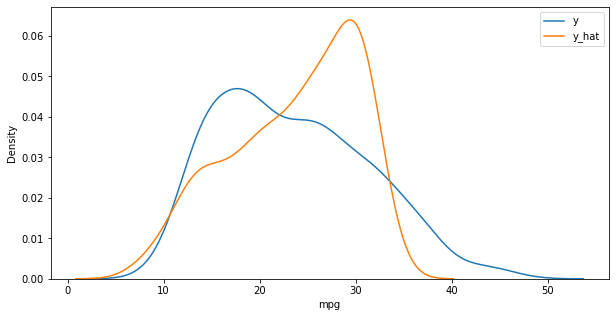

In [21]:
plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_hat, label = "y_hat", ax = ax1)

plt.legend()
plt.show()